In [2]:

## Libraries

from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

pd.set_option('display.max_colwidth', None)

MAX_DATASET_SAMPLES = 5000 # Datasets will the capped to this sample_size to keep experiments fast 


In [3]:

## Import Data

datasets = [
    {
        "name": "wisconsin data",
        "path": "C:\\Users\\arpitha_work\\Downloads\\TRU MSCDS\\Sem2\\DS Seminar\\Project 1\\Datasets\\wisconsin data.csv",
        "features_numerical": [
            "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
            "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", 
            "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", 
            "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", 
            "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", 
            "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
            "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
        ],
        "features_categorical": [],
        "target": "diagnosis"
    },

    {
        "name": "breast-cancer-dataset",
        "path": "C:\\Users\\arpitha_work\\Downloads\\TRU MSCDS\\Sem2\\DS Seminar\\Project 1\\Datasets\\breast-cancer-dataset.csv",
        "features_numerical": ["Year", "Age", "Tumor Size (cm)", "Inv-Nodes"],
        "features_categorical": ["Menopause", "Breast", "Metastasis", "Breast Quadrant", "History"],
        "target": "Diagnosis Result"
    },

    {
        "name": "BRCA",
        "path": "C:\\Users\\arpitha_work\\Downloads\\TRU MSCDS\\Sem2\\DS Seminar\\Project 1\\Datasets\\BRCA.csv",
        "features_numerical": ["Age", "Protein1", "Protein2", "Protein3", "Protein4"],
        "features_categorical": ["Gender", "Tumour_Stage", "Histology", "ER status", "PR status", "HER2 status", "Surgery_type"],
        "target": "Patient_Status"
    },

    {
        "name": "german bs data",
        "path": "C:\\Users\\arpitha_work\\Downloads\\TRU MSCDS\\Sem2\\DS Seminar\\Project 1\\Datasets\\german bs data.csv",
        "features_numerical": ["age", "size", "grade", "nodes", "pgr", "er", "rfstime"],
        "features_categorical": ["meno", "hormon"],
        "target": "status"
    },

    {
        "name": "seer data",
        "path": "C:\\Users\\arpitha_work\\Downloads\\TRU MSCDS\\Sem2\\DS Seminar\\Project 1\\Datasets\\seer data.csv",
        "features_numerical": ["Age", "Survival Months", "Regional Node Examined"],
        "features_categorical": ["Race", "Marital Status", "T Stage", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Reginol Node Positive"],
        "target": "Status"
    }
]


dataset_path = datasets[0]["path"]
df = pd.read_csv(dataset_path)
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
## EDA
def describe_dataframe(df:pd.DataFrame)->pd.DataFrame:
    df_describe = df.describe()
    df_describe.loc['dtype'] = df_describe.dtypes
    df_describe.loc['null_count'] = df_describe.isnull().sum()
    print("df.shape:", df.shape)
    return df_describe

describe_dataframe(df)

df.shape: (569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,0.0
mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.07972,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8670.0,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,...,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504,NaN
25%,869218.0,11.7,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,...,21.08,84.11,515.3,0.1166,0.1472,0.1145,0.06493,0.2504,0.07146,NaN
50%,906024.0,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.0335,0.1792,...,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004,NaN
75%,8813129.0,15.78,21.8,104.1,782.7,0.1053,0.1304,0.1307,0.074,0.1957,...,29.72,125.4,1084.0,0.146,0.3391,0.3829,0.1614,0.3179,0.09208,NaN
max,911320502.0,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,...,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075,NaN
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


### Define Model 

In [5]:
# Suppress onehot transformation warnings
import warnings
import re
original_showwarning = warnings.showwarning
def custom_showwarning(message, category, filename, lineno, file=None, line=None):
    if re.match(r"Found unknown categories in columns \[\d+\] during transform\. These unknown categories will be encoded as all zeros", str(message)):
        return  # Suppress the specific warning
    original_showwarning(message, category, filename, lineno, file, line)
warnings.showwarning = custom_showwarning

In [6]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

def create_pipeline(dataset:dict, classifier:BaseEstimator)->Pipeline:

    features_numerical = dataset["features_numerical"]
    features_categorical = dataset["features_categorical"]
    target = dataset['target']
    features_all = features_numerical+features_categorical

    numerical_pipeline = Pipeline(steps=[
        # ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ])
    categorical_pipeline = Pipeline(steps=[
        # ('impute', SimpleImputer(strategy='most_frequent')),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
    ])
    column_transformer = ColumnTransformer(transformers=[
        ('numerical', numerical_pipeline, features_numerical),
        ('categorical', categorical_pipeline, features_categorical)
    ])
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer),
        ('classifier', classifier)
    ])
    
    return pipeline

# pipeline example
create_pipeline(datasets[0], LogisticRegression())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'sm...
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', LogisticRegression())])

In [9]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier


classifiers = [
    SVC(probability=True),
    KNeighborsClassifier(),
    LogisticRegression(n_jobs=-1),
    MLPClassifier(max_iter=1000),
    RandomForestClassifier(n_jobs=-1),
    # ExtraTreesClassifier(n_jobs=-1),
    GradientBoostingClassifier(),
    # paper
    StackingClassifier(n_jobs=-1, estimators=[('lr', LogisticRegression(n_jobs=-1)),    ('rf', RandomForestClassifier(n_jobs=-1))], final_estimator=LogisticRegression()),
    StackingClassifier(n_jobs=-1, estimators=[('svm', SVC(probability=True)),           ('mlp', MLPClassifier(max_iter=1000))], final_estimator=LogisticRegression()),
    StackingClassifier(n_jobs=-1, estimators=[('lr', LogisticRegression(n_jobs=-1)),    ('mlp', MLPClassifier(max_iter=1000))], final_estimator=LogisticRegression()),
    # Arpitha
    StackingClassifier(n_jobs=-1, estimators=[('knn', KNeighborsClassifier(n_jobs=-1)), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()),
    StackingClassifier(n_jobs=-1, estimators=[('lr', LogisticRegression(n_jobs=-1)), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()),
    StackingClassifier(n_jobs=-1, estimators=[('lr', LogisticRegression(n_jobs=-1)), ('knn', KNeighborsClassifier(n_jobs=-1))], final_estimator=LogisticRegression()),

]

### Training 

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

# Prepare dataset
dataset = datasets[0]  # Using the first dataset as an example
X = df[dataset['features_numerical'] + dataset['features_categorical']]
y = df[dataset['target']]

# Convert categorical target to numerical if needed
y = y.astype('category').cat.codes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Classifier: SVC
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Classifier: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Classifier: LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97  

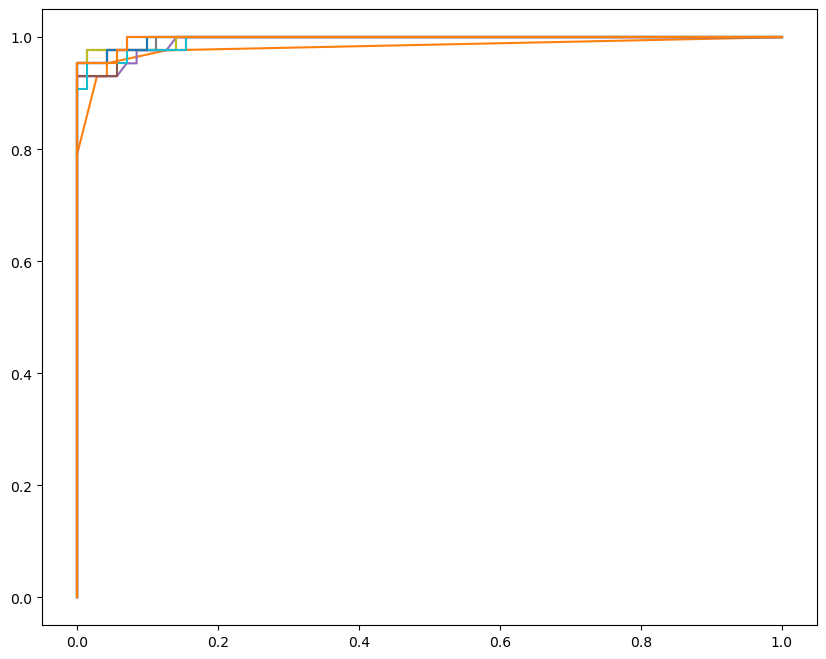

In [11]:
# Train models and evaluate results
results = {}
plt.figure(figsize=(10, 8))

for classifier in classifiers:
    clf_name = classifier.__class__.__name__
    pipeline = create_pipeline(dataset, classifier)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Store results
    results[clf_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {results[clf_name]["roc_auc"]:.2f})')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


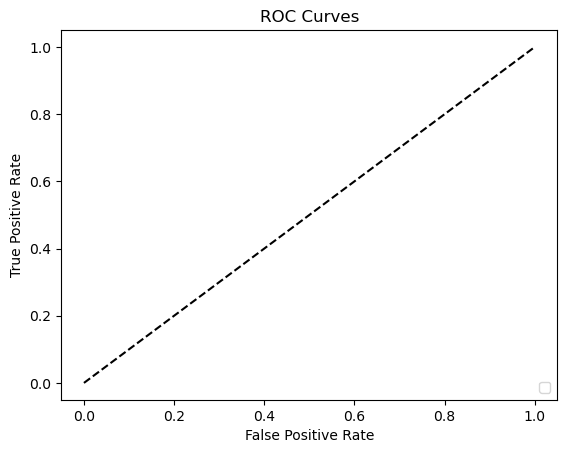

{'GradientBoostingClassifier': {'accuracy': 0.956140350877193,
                                'f1_score': 0.9411764705882352,
                                'roc_auc': 0.9941041598427776},
 'KNeighborsClassifier': {'accuracy': 0.9473684210526315,
                          'f1_score': 0.9302325581395349,
                          'roc_auc': 0.9819849328529314},
 'LogisticRegression': {'accuracy': 0.9736842105263158,
                        'f1_score': 0.9647058823529412,
                        'roc_auc': 0.99737962659679},
 'MLPClassifier': {'accuracy': 0.9736842105263158,
                   'f1_score': 0.9647058823529412,
                   'roc_auc': 0.9954143465443825},
 'RandomForestClassifier': {'accuracy': 0.9649122807017544,
                            'f1_score': 0.9523809523809524,
                            'roc_auc': 0.9934490664919752},
 'SVC': {'accuracy': 0.9824561403508771,
         'f1_score': 0.9761904761904763,
         'roc_auc': 0.99737962659679},
 'StackingClass

In [12]:
# Plot ROC curve graph
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Print final results summary
pprint(results)
